# EDA

Kernel to use: Python 3.7.3 64-bit (conda). On the bottom left of VSCode it says: Python 3.9.5 64-bit

In [1]:
import warnings
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config

warnings.filterwarnings("ignore")

sklearn.show_versions()
#import sklearn
#sklearn.__version__
#set_config(display='diagram')

NameError: name 'sklearn' is not defined

In [2]:
data = pd.read_csv('data/train.csv')
data

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8
...,...,...,...,...,...,...,...,...,...,...,...,...
7106,2010-12-31 20:00:00,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1
7107,2010-12-31 21:00:00,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3
7108,2010-12-31 22:00:00,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4
7109,2010-12-31 23:00:00,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8


In [12]:
#import sys
#!conda update scikit-learn --yes --prefix {sys.prefix}

In [13]:
# Check for missing values
data.isnull().values.any()

False

In [14]:
data.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


In [72]:
data.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


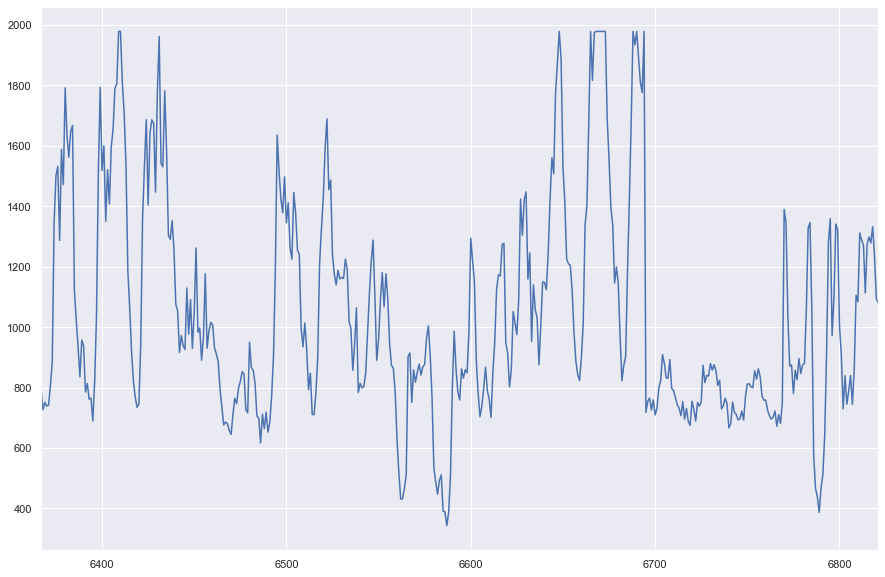

In [221]:
somedays = data[(data['date_time'] > '2010-12-1') & (data['date_time'] < '2010-12-20')]
somedays['sensor_5'].plot(figsize=(15,10))
plt.show()

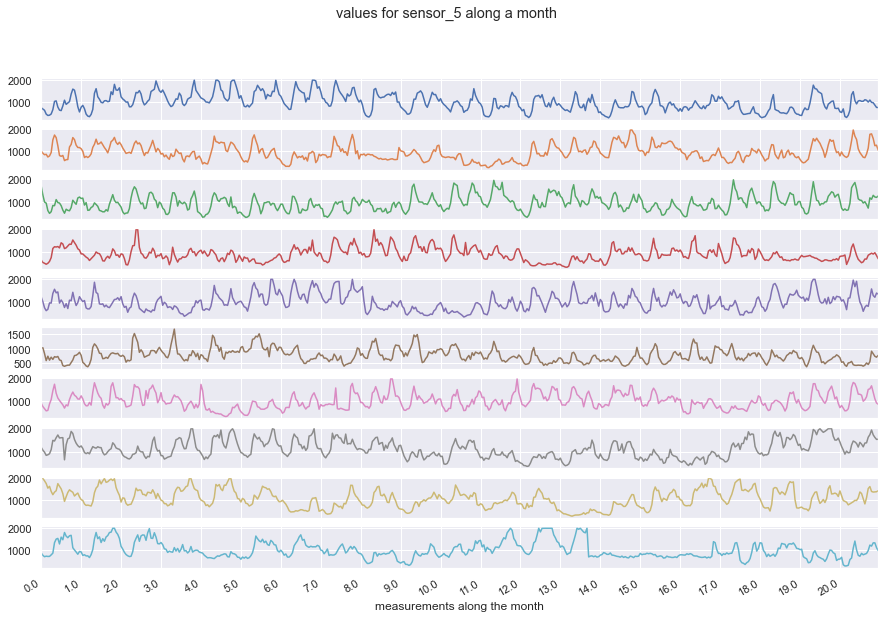

In [208]:
from pandas import Grouper

field_to_show = 'sensor_5'

data.date_time = pd.to_datetime(data['date_time'])
single_column_data = data[['date_time', field_to_show]]
single_column_data = single_column_data[(single_column_data['date_time'] >= '2010-03-11') & (single_column_data['date_time'] < '2011-01-01' )]

single_column_data.set_index('date_time')

groups = single_column_data.groupby(Grouper(key='date_time', freq='MS'))

days = pd.DataFrame()
for name, group in groups:
    days[name.date()] = pd.Series(group.values[:,1]) #the pd.Series call solves the problem of months of different lengths

days.plot(subplots=True, legend=False, title = "values for " + field_to_show + " along a month", figsize=(15,10), )
plt.xlabel("measurements along the month")
plt.xticks(np.arange(0, 500, 24), np.arange(0, 500, 24)/24)
plt.show()


In [227]:
data[data['target_benzene'] < .4].head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
524,2010-04-01 14:00:00,23.1,35.4,0.2170,1061.0,369.3,1771.3,554.2,578.8,1.6,0.1,99.0
525,2010-04-01 15:00:00,24.3,33.1,0.2167,1038.6,396.8,1851.2,608.0,621.1,1.9,0.1,105.8
526,2010-04-01 16:00:00,24.5,35.4,0.2163,1083.1,381.1,1742.3,591.1,626.8,2.4,0.1,133.6
701,2010-04-08 23:00:00,25.4,31.6,0.2200,1138.0,393.3,1855.3,587.1,654.7,2.1,0.1,129.0
702,2010-04-09 00:00:00,24.0,33.8,0.2136,1054.7,384.4,1823.0,643.2,861.3,2.4,0.1,152.5


In [75]:
single_column_data = data[['date_time', 'deg_C']]
single_column_data = single_column_data[(single_column_data['date_time'] >= '2010-03-11')] # & (single_column_data['date_time'] < '2011-01-01' )
single_column_data

,date_time,deg_C
6,2010-03-11 00:00:00,10.7
7,2010-03-11 01:00:00,10.3
8,2010-03-11 02:00:00,10.1
9,2010-03-11 03:00:00,10.5
10,2010-03-11 04:00:00,9.4
...,...,...
7106,2010-12-31 20:00:00,9.2
7107,2010-12-31 21:00:00,9.1
7108,2010-12-31 22:00:00,9.6
7109,2010-12-31 23:00:00,8.0


In [76]:
#profile = ProfileReport(data)
#profile.to_widgets()

In [58]:
#filter only the columns we want to process for outliers - version 1
other_columns = data.columns.difference(numerical_columns)
filt_df = data.loc[:, numerical_columns]

# compute percentiles
low = 0.02 # .05
high = .98 # .95
quant_df = filt_df.quantile([low, high])
#print(quant_df)

# filter values based on computed percentiles
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & (x < quant_df.loc[high,x.name])], axis=0)

# bring the removed columns back
filt_df = pd.concat([data.loc[:,other_columns], filt_df], axis=1)

# drop columns with NaN's
filt_df.dropna(inplace=True)
data = filt_df

# with 0.02 / 0.98 result was: 0.28264

In [40]:
#filter only the columns we want to process for outliers - version 2: remove rows with many outliers
features = data[["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5"]]

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outliersdf = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))
outliersdf = outliersdf[ (outliersdf.sensor_1 == True) | (outliersdf.sensor_2 == True) | (outliersdf.sensor_3 == True) | (outliersdf.sensor_4 == True) | (outliersdf.sensor_5 == True)]

where_outliers_are_df = outliersdf.astype(int).sum(axis=1)
rows_to_delete = where_outliers_are_df.loc[lambda where_outliers_are_df: where_outliers_are_df >= 3]
len(rows_to_delete)

data = data.drop(rows_to_delete.index, axis=0)
# didn't work: score was 0.26

In [134]:
#filter only the columns we want to process for outliers - version 3: don't remove outliers, set them to max/min of the column
data = pd.read_csv('data/train.csv')

features = data[["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5"]]

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
lower_bounds = Q1 - 1.5 * IQR
upper_bounds = Q3 + 1.5 * IQR

data[["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5"]] = data[["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5"]].clip_lower(lower_bounds, axis=1)
data[["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5"]] = data[["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5"]].clip_upper(upper_bounds, axis=1)

# this sort of worked - score 0.24868,an improvement of your previous score of 0.25181

In [127]:
lower_bounds
data[["sensor_1","sensor_2","sensor_3","sensor_4","sensor_5"]]

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,1387.2,1087.8,1056.0,1742.8,1293.4
1,1279.1,888.2,1197.5,1449.9,1010.9
2,1331.9,929.6,1060.2,1586.1,1117.0
3,1321.0,929.0,1102.9,1536.5,1263.2
4,1272.0,852.7,1180.9,1415.5,1132.2
...,...,...,...,...,...
7106,1000.5,811.2,873.0,909.0,910.5
7107,1022.7,790.0,951.6,912.9,903.4
7108,1044.4,767.3,861.9,889.2,1159.1
7109,952.8,691.9,908.5,917.0,1206.3


# Exploratory Model Training

In [15]:
#https://www.kaggle.com/carlolepelaars/understanding-the-metric-rmsle
def NumPyRMSLE(y_true:list, y_pred:list) -> float:
    """
        The Root Mean Squared Log Error (RMSLE) metric using only NumPy
        N.B. This function is a lot slower than sklearn's implementation
        
        :param y_true: The ground truth labels given in the dataset
        :param y_pred: Our predictions
        :return: The RMSLE score
    """
    n = len(y_true)
    msle = np.mean([(np.log(y_pred[i] + 1) - np.log(y_true[i] + 1)) ** 2.0 for i in range(n)])
    return np.sqrt(msle)

In [16]:
# https://johaupt.github.io/scikit-learn/tutorial/python/data%20processing/ml%20pipeline/model%20interpretation/columnTransformer_feature_names.html
import sklearn

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [17]:
from sklearn.base import TransformerMixin, BaseEstimator
#from sklearn_pandas import DataFrameMapper

class DateFormatter(TransformerMixin):

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xdate = X.apply(pd.to_datetime)
        return Xdate
        
class DateTransformer(TransformerMixin, BaseEstimator):
    """Extracts features from datetime column
    
    Returns:
      hour: hour
      day: Between 1 and the number of days in the month
      month: Between 1 and 12 inclusive.
      year: four-digit year
      weekday: day of the week as an integer. Mon=0 and Sun=6
   """
    def fit(self, x, y=None):
            return self

    def transform(self, x, y=None):
            colname= 'date_time'
            result = pd.DataFrame(x, columns=[colname])
            #result['year'] = [dt.year for dt in result[colname]]
            #result['month'] = [dt.month for dt in result[colname]]
            #result['day'] = [dt.day for dt in result[colname]]
            result['hour'] = [dt.hour for dt in result[colname]]
            result['day_of_week'] = [dt.dayofweek for dt in result[colname]] #weekday()
            result['week_of_year'] = [dt.isocalendar()[1] for dt in result[colname]] #dt.strftime("%W") 
            result['is_weekend'] = [int(dt.dayofweek >= 5) for dt in result[colname]]
            return result[['hour', 'day_of_week', 'week_of_year', 'is_weekend']]
        
    def get_feature_names(self):
            return ['hour', 'day_of_week', 'week_of_year', 'is_weekend']

In [67]:
from interpret.glassbox import ExplainableBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, OneHotEncoder
import lightgbm as lgb

# prepare the data
target_columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides' ]
y = data[target_columns]
X = data[data.columns.difference(target_columns)]
X.date_time = X.date_time.astype(str) #EBR's don't support datetimes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

#create pipelines
numerical_columns_selector = selector(dtype_include='float64')
numerical_columns = numerical_columns_selector(X_train)

dates_pipeline = Pipeline([
        ('date_formatter', DateFormatter()), ('date_encoder', DateTransformer())
        ])

ct = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), numerical_columns),
        #('poly_feat_gen', PolynomialFeatures(), numerical_columns),
        ('date_expansion', dates_pipeline, ['date_time']),
    ]
)

ct_ohe = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [9]) #to apply in a sequence to one of the generated variables
    ],
    remainder='passthrough'
)

pipeline_cm = make_pipeline(ct, ct_ohe, lgb.LGBMRegressor(n_estimators=300, max_depth=30, learning_rate=0.05, random_state=42))
pipeline_benz = make_pipeline(ct, ct_ohe, lgb.LGBMRegressor(n_estimators=300, max_depth=30, learning_rate=0.05, random_state=42))
pipeline_no = make_pipeline(ct, ct_ohe, lgb.LGBMRegressor(n_estimators=250, max_depth=15, learning_rate=0.05, random_state=42))

# older hyper-parameters
#pipeline_cm = make_pipeline(ct, lgb.LGBMRegressor(n_estimators=150, max_depth=20, learning_rate=0.05, random_state=42))
#pipeline_benz = make_pipeline(ct, lgb.LGBMRegressor(n_estimators=200, max_depth=20, learning_rate=0.05, random_state=42))
#pipeline_no = make_pipeline(ct, lgb.LGBMRegressor(n_estimators=150, max_depth=15, learning_rate=0.05, random_state=42))

# target transformation
#log_target_transform_cm = TransformedTargetRegressor(regressor=pipeline_cm, func=np.log1p, inverse_func=np.expm1)
#log_target_transform_benz = TransformedTargetRegressor(regressor=pipeline_benz, func=np.log1p, inverse_func=np.expm1)
#log_target_transform_no = TransformedTargetRegressor(regressor=pipeline_no, func=np.log1p, inverse_func=np.expm1)

#log_target_transform_cm.fit(X_train, y_train[target_columns[0]]) #[numerical_columns]
#print("Trained log_target_transform_cm")

#log_target_transform_benz.fit(X_train, y_train[target_columns[1]])
#print("Trained log_target_transform_benz")

#log_target_transform_no.fit(X_train, y_train[target_columns[2]])
#print("Trained log_target_transform_no")

#pipeline_cm
#pipeline_cm['columntransformer']

In [68]:
pipeline_cm.fit(X_train, y_train[target_columns[0]])
print("Trained pipeline_cm")

pipeline_benz.fit(X_train, y_train[target_columns[1]])
print("Trained pipeline_benz")

pipeline_no.fit(X_train, y_train[target_columns[2]])
print("Trained pipeline_no")

Trained pipeline_cm
Trained pipeline_benz
Trained pipeline_no


In [69]:
get_feature_names(pipeline_cm['columntransformer-2'])

['onehot__x0_0.0',
 'onehot__x0_1.0',
 'onehot__x0_2.0',
 'onehot__x0_3.0',
 'onehot__x0_4.0',
 'onehot__x0_5.0',
 'onehot__x0_6.0',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x10',
 'x11']

In [60]:
# Boxplots
#sns.set(rc={'figure.figsize':(15,10)})
#sns.boxplot(data=data[numerical_columns])
#ct.named_transformers_['poly'].get_feature_names()

In [70]:
from sklearn.metrics import mean_squared_log_error
import math

pred_cm = pipeline_cm.predict(X_test) #[numerical_columns]
pred_benz = pipeline_benz.predict(X_test)
pred_no = pipeline_no.predict(X_test)

#pred_cm = log_target_transform_cm.predict(X_test)
#pred_benz = log_target_transform_benz.predict(X_test)
#pred_no = log_target_transform_no.predict(X_test)


# https://stackoverflow.com/questions/57839824/how-to-pre-process-the-data-to-calculate-root-mean-squared-logarithmic-error
# this fails if negative predictions < -1.0 / keeps happening with no
error_cm = NumPyRMSLE(y_test[target_columns[0]].tolist(), pred_cm.tolist())   # mean_squared_log_error(y_test[target_columns[0]], pred_cm)
error_benz = NumPyRMSLE(y_test[target_columns[1]].tolist(), pred_benz.tolist())
error_no = NumPyRMSLE(y_test[target_columns[2]].tolist(), pred_no.tolist())

print("RMSLE CM:", error_cm)
print("RMSLE BE:",error_benz)
print("RMSLE NO:",error_no)
print("Mean: ", ((error_cm + error_benz + error_no)/3), " SUM: ", error_cm + error_benz + error_no)

RMSLE CM: 0.20730275966177292
RMSLE BE: 0.10602977256144762
RMSLE NO: 0.45469636804244135
Mean:  0.2560096334218873  SUM:  0.768028900265662


In [69]:
preds = pd.DataFrame(pred_no)
preds[preds[0] < 0]
y_test.iloc[701] #bam - previsão negativa quando target_benzene = 0.1 ... os sensores devem estar todos a dar raia também.

print(pred_cm.shape[0], X_test.shape, y_test[target_columns[0]].shape)
#y_test[target_columns[0]].shape

1778 (1778, 9) (1778,)


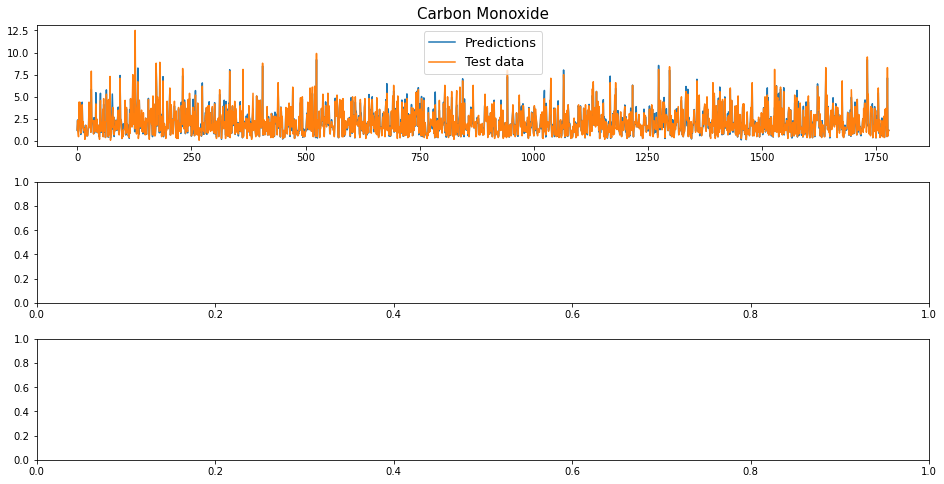

In [76]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(16, 8))
plt.set_cmap("Set2")
plt.subplots_adjust(hspace = 0.3)

axs[0].plot(pred_cm, label="Predictions")
axs[0].plot(np.arange(0, pred_cm.shape[0], 1), y_test[target_columns[0]], label="Test data")
axs[i].set_title("Carbon Monoxide", fontsize=15)
axs[0].legend(fontsize=13)

# faltam os outros dois -- mas isto com shuffle não serve de nada

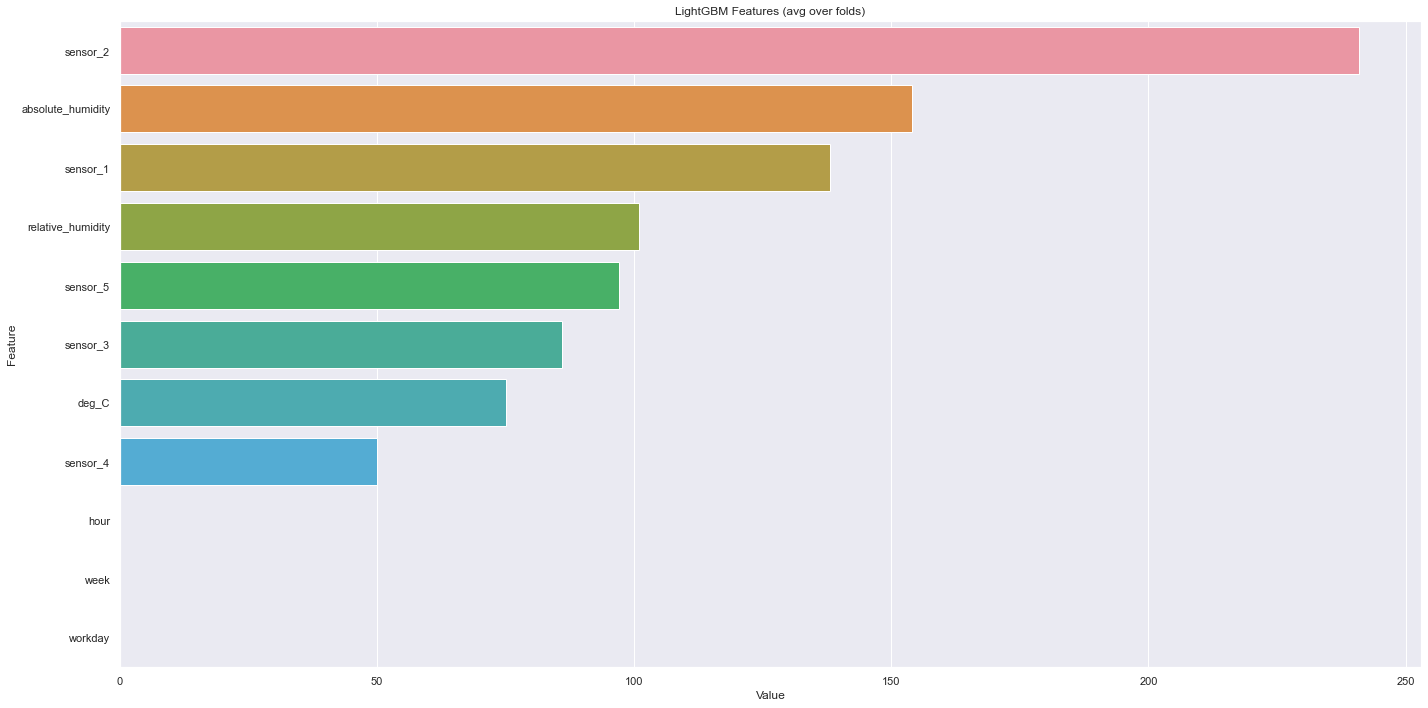

In [304]:
all_columns = numerical_columns.copy()
all_columns.append("hour")
all_columns.append('workday')
all_columns.append('week')

feature_imp = pd.DataFrame(sorted(zip(pipeline_no["lgbmregressor"].feature_importances_,all_columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# Hyperparameter tuning

In [8]:
# Do some hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {  'lgbmregressor__n_estimators': [100, 150, 200, 250, 300],
                'lgbmregressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
                'lgbmregressor__max_depth': [15, 20, 25, 30],
                #'lgbmregressor__num_leaves': 32,
                #'lgbmregressor__feature_fraction': 0.8,
                #'lgbmregressor__subsample': 0.2
                }

search_cm = RandomizedSearchCV(pipeline_cm, param_distributions=param_dist, cv=5, n_iter=50)
search_cm.fit(X_train, y_train[target_columns[0]]) #[numerical_columns]
print(search_cm.best_params_)
print("search done for cm")

search_benz = RandomizedSearchCV(pipeline_benz, param_distributions=param_dist, cv=5, n_iter=50)
search_benz.fit(X_train, y_train[target_columns[1]])
print(search_benz.best_params_)
print("search done for benz")

search_no = RandomizedSearchCV(pipeline_no, param_distributions=param_dist, cv=5, n_iter=50)
search_no.fit(X_train, y_train[target_columns[2]])
print(search_no.best_params_)
print("search done for no")


{'lgbmregressor__n_estimators': 300, 'lgbmregressor__max_depth': 30, 'lgbmregressor__learning_rate': 0.05}
search done for cm
{'lgbmregressor__n_estimators': 300, 'lgbmregressor__max_depth': 30, 'lgbmregressor__learning_rate': 0.05}
search done for benz
{'lgbmregressor__n_estimators': 250, 'lgbmregressor__max_depth': 15, 'lgbmregressor__learning_rate': 0.05}
search done for no


In [10]:
print(search_cm.best_params_)
print(search_benz.best_params_)
print(search_no.best_params_)

# make submission predictions
pred_cm = search_cm.predict(X_test) #[numerical_columns]
pred_benz = search_benz.predict(X_test)
pred_no = search_no.predict(X_test)

# https://stackoverflow.com/questions/57839824/how-to-pre-process-the-data-to-calculate-root-mean-squared-logarithmic-error
# this fails if negative predictions < -1.0

pred_no[pred_no<0] = 0

error_cm = NumPyRMSLE(y_test[target_columns[0]].tolist(), pred_cm.tolist())   # mean_squared_log_error(y_test[target_columns[0]], pred_cm)
error_benz = NumPyRMSLE(y_test[target_columns[1]].tolist(), pred_benz.tolist())
error_no = NumPyRMSLE(y_test[target_columns[2]].tolist(), pred_no.tolist())

print(error_cm + error_benz + error_no)

{'lgbmregressor__n_estimators': 300, 'lgbmregressor__max_depth': 30, 'lgbmregressor__learning_rate': 0.05}
{'lgbmregressor__n_estimators': 300, 'lgbmregressor__max_depth': 30, 'lgbmregressor__learning_rate': 0.05}
{'lgbmregressor__n_estimators': 250, 'lgbmregressor__max_depth': 15, 'lgbmregressor__learning_rate': 0.05}
0.4123682151781253


# Score holdout file for submission

In [72]:
test_data = pd.read_csv('data/test.csv')

In [73]:
# make submission predictions
#test_data.date_time = test_data.date_time.astype(str) #EBR's don't support datetimes

holdout_pred_cm = pipeline_cm.predict(test_data) #[numerical_columns]
holdout_pred_benz = pipeline_benz.predict(test_data)
holdout_pred_no = pipeline_no.predict(test_data)

#holdout_pred_cm = search_cm.predict(test_data) #[numerical_columns]
#holdout_pred_benz = search_benz.predict(test_data)
#holdout_pred_no = search_no.predict(test_data)

#holdout_pred_cm = log_target_transform_cm.predict(test_data) #[numerical_columns]
#holdout_pred_benz = log_target_transform_benz.predict(test_data)
#holdout_pred_no = log_target_transform_no.predict(test_data)



#print(holdout_pred_cm[holdout_pred_cm], holdout_pred_benz[holdout_pred_benz], holdout_pred_no[holdout_pred_no]) 

In [74]:
test_data['target_carbon_monoxide'] = holdout_pred_cm
test_data['target_benzene'] = holdout_pred_benz
test_data['target_nitrogen_oxides'] = holdout_pred_no
data_to_save = test_data.drop(numerical_columns, axis=1)


In [75]:
data_to_save.reset_index()
data_to_save.to_csv('data/holdout_predictions.csv', index=False)

In [50]:
test_data

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1,1.266313,5.061149,261.403619
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0,1.877624,7.454712,319.602283
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8,1.743448,7.790231,343.274504
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0,1.919616,7.647079,343.398599
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3,0.957714,6.607816,224.130712
...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2011-04-04 10:00:00,23.2,28.7,0.7568,1340.3,1023.9,522.8,1374.0,1659.8,2.598556,13.025788,483.265256
2243,2011-04-04 11:00:00,24.5,22.5,0.7119,1232.8,955.1,616.1,1226.1,1269.0,2.281987,11.306307,385.103972
2244,2011-04-04 12:00:00,26.6,19.0,0.6406,1187.7,1052.4,572.8,1253.4,1081.1,2.265870,12.533130,300.427122
2245,2011-04-04 13:00:00,29.1,12.7,0.5139,1053.2,1009.0,702.0,1009.8,808.5,1.867048,10.843832,316.232811


In [418]:
pipeline_cm.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('date_expansion',
                                    Pipeline(memory=None,
                                             steps=[('formatter',
                                                     <__main__.DateFormatter object at 0x000001B9742D3F98>),
                                                    ('encoder',
                                                     DateTransformer())],
                                             verbose=False),
                                    ['date_time']),
                                   ('scaler',
                                    MinMaxScaler(copy=True, feature_range=(0, 1)),
                                    ['absolute_humidity', 'deg_C',
                                     'relative_humidity', 'sensor_1', 'sensor_2',
             

# Random things to try/add

In [ ]:
# Random bits to add

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
sns.pairplot(data, hue="target variable")

In [ ]:
# Convert Religion variable to Category
data["Religion (code)"] = data["Religion (code)"].astype("category")

# One hot encode Religion
data = pd.get_dummies(data,prefix=['Religion'], drop_first=True)
data.head()

In [ ]:
import seaborn as sns

sns.displot(data = data, x = "Activity on Company Forums", kind="kde", hue = "EmployeeTargetedOverPastYear", fill=True)